In [82]:
# Import Packages
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

In [2]:
# Dense Layer 1
class Layer_Dense_In:

  # Layer initialization
  def __init__(self,n_inputs,n_neurons,variance):
    # Initialize weights and biases
    self.weights = [[1+variance*np.random.randn(1)[0], 1+variance*np.random.randn(1)[0]]]
    self.biases = [[0+variance*np.random.randn(1)[0], -0.5+variance*np.random.randn(1)[0]]]

  # Forward pass
  def forward(self,inputs):
    # Calculate output values from inputs, weights and biases
    self.output = np.dot(inputs, self.weights) + self.biases

# Dense Layer 2
class Layer_Dense_Out:
  
  # Layer initialization
  def __init__(self,n_inputs,n_neurons,variance):
    # Initialize weights and biases
    self.weights = [[2+variance*np.random.randn(1)[0]],[-4+variance*np.random.randn(1)[0]]]
    self.biases = [[0+variance*np.random.randn(1)[0]]]

  # Forward pass
  def forward(self,inputs):
    # Calculate output values from inputs, weights and biases
    self.output = np.dot(inputs, self.weights) + self.biases

In [3]:
# ReLU activation
class Activation_ReLU:

  # Forward pass
  def forward(self,inputs):
    # Calculate output values from inputs
    self.output = np.maximum(0,inputs)

In [6]:
# Data Flow at every level

def RNN_Pass(input):

  layer_in.forward(input)
  layer_act1.forward(layer_in.output)
  layer_out.forward(layer_act1.output)
  layer_act2.forward(layer_out.output)

  return layer_out.output[0][0]

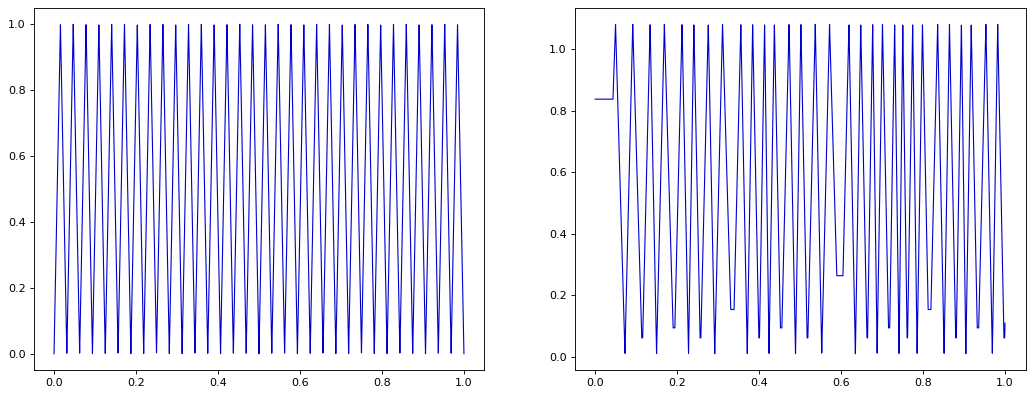

In [109]:
# Main Loop - Mapping of [0,1] -> [0,1]

# Initialization parameters:
# * Network Depth
# * Variance
# * Image Resolution

layer_in, layer_out, layer_act1, layer_act2 = dict(), dict(), dict(), dict()

depth = 6
variance = 0

X_granularity = 12587
test_X = np.linspace(0,1,num=X_granularity, endpoint=True)
test_X_plot = np.linspace(0,1,num=X_granularity, endpoint=True)

layer_in = Layer_Dense_In(1,2,variance)
layer_out = Layer_Dense_Out(2,1,variance)
layer_act1 = Activation_ReLU()
layer_act2 = Activation_ReLU()

# Function calculation
for iter in range(len(test_X)):
  for pos in range(depth):
    test_X_plot[iter] = RNN_Pass(test_X_plot[iter])

layer_in, layer_out, layer_act1, layer_act2 = dict(), dict(), dict(), dict()

depth = 6
variance = 0.1
X_granularity = 12587
test_X = np.linspace(0,1,num=X_granularity, endpoint=True)
test_X_plot_var = np.linspace(0,1,num=X_granularity, endpoint=True)
 
# Layer Initialization

layer_in = Layer_Dense_In(1,2,variance)
layer_out = Layer_Dense_Out(2,1,variance)
layer_act1 = Activation_ReLU()
layer_act2 = Activation_ReLU()

# Function calculation
for iter in range(len(test_X)):
  for pos in range(depth):
    test_X_plot_var[iter] = RNN_Pass(test_X_plot_var[iter])

# Plots
figure(figsize=(16, 6), dpi=80)
#plt.figure(dpi=600)
plt.subplot(1, 2, 1)
plt.plot(test_X,test_X_plot,linewidth=1,c='mediumblue')
plt.subplot(1, 2, 2)
plt.plot(test_X,test_X_plot_var,linewidth=1,c='mediumblue')
#plt.tight_layout()
plt.show()

In [113]:
# Run this cell to save the weights and biases of the network

import pickle

with open('weights1rnn.pickle', 'wb') as handle:
    pickle.dump(layer_in, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('weights2rnn.pickle', 'wb') as handle:
    pickle.dump(layer_out, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [114]:
# Run this cell to load the weights and biases of the network

with open('weights1rnn.pickle', 'rb') as handle:
    layer_in = pickle.load(handle)

with open('weights2rnn.pickle', 'rb') as handle:
    layer_out = pickle.load(handle)